# **Economic Data Extraction and Analysis**

This project is dedicated to extracting and analyzing economic data from Wikipedia pages of sovereign states. By utilizing web scraping techniques, the project compiles critical information, such as GDP, population, and Human Development Index (HDI), into a structured dataset for further analysis. The focus is on identifying patterns, relationships, and insights from the collected data.

## **Project Overview**

The project contains the following key components:

1. **Web Scraping**: Data is collected from Wikipedia using `requests` and `lxml` libraries. A function is defined to scrape country-specific data from the "List of Sovereign States" page and corresponding country pages.

2. **Data Preparation**: After scraping, the data is cleaned and preprocessed. This includes handling missing values, converting text fields into numeric formats, and preparing the dataset for analysis.

3. **Exploratory Data Analysis (EDA)**: 
   - Descriptive statistics are calculated to understand the central tendencies and variability in the dataset.
   - Visualizations, including histograms and scatter plots, reveal patterns and trends in the data.

4. **Key Insights**: Relationships between variables such as GDP, population, HDI, and inequality are explored to provide actionable insights.

5. **OLS Regression Analysis**: A regression model is built to quantify the relationships between GDP per capita and predictors such as HDI, population size, and income inequality.

This comprehensive approach combines web scraping, data preprocessing, and statistical analysis to extract meaningful insights from economic data.


## **Web Scraping: Extracting Economic Data**

The web scraping process is focused on collecting comprehensive economic data for sovereign states from Wikipedia. Using the `requests` and `lxml` libraries, the workflow is designed to systematically extract structured information for analysis.

### **Steps Involved:**

1. **Collecting Sovereign States URLs**:
   - The process begins by identifying and extracting URLs from Wikipedia's "List of Sovereign States" page.
   - These URLs serve as links to the individual Wikipedia pages for each country.

2. **Defining the Extraction Logic**:
   - A dedicated function is created to scrape key information from each country's page.
   - The function utilizes **XPath queries** to precisely locate data elements such as GDP, population, HDI, and land area.

3. **Scraping Country Pages**:
   - Each country's Wikipedia page is visited using the scraped URLs.
   - Data fields are extracted and organized systematically.

4. **Compiling Data**:
   - Extracted data for all countries is compiled into a structured format.
   - The final dataset is saved as a CSV file (`countries_data.csv`) for further analysis.

This approach ensures that the data is collected efficiently, maintaining consistency and accuracy across all country entries.


In [1]:
import requests
from lxml import html
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
def get_country_urls():
    url ="https://en.wikipedia.org/wiki/List_of_sovereign_states"
    response = requests.get(url)
    tree = html.fromstring(response.content)
    country_links = tree.xpath('//table[contains(@class,"wikitable")]/tbody/tr/td[1]//a/@href')

    base_url ="https://en.wikipedia.org"
    return [base_url + link for link in country_links if link.startswith("/wiki")]

In [18]:
#Testing the function
urls = get_country_urls()
print(urls[:10]) 

['https://en.wikipedia.org/wiki/Afghanistan', 'https://en.wikipedia.org/wiki/Albania', 'https://en.wikipedia.org/wiki/Algeria', 'https://en.wikipedia.org/wiki/Andorra', 'https://en.wikipedia.org/wiki/Angola', 'https://en.wikipedia.org/wiki/Antigua_and_Barbuda', 'https://en.wikipedia.org/wiki/Argentina', 'https://en.wikipedia.org/wiki/Armenia', 'https://en.wikipedia.org/wiki/Australia', 'https://en.wikipedia.org/wiki/Austria']


In [19]:
def get_country_info(country_url):
    response =requests.get(country_url)
    tree =html.fromstring(response.content)

    def extract_first_or_none(xpath_query):
        results = tree.xpath(xpath_query)
        return ' '.join(results[0].strip().split()) if results else "Not available"

    #Xpaths
    country_name_xpath= "//div[@class='fn org country-name']/text()"
    country_name = extract_first_or_none(country_name_xpath)

    # XPath for area in square kilometers (without square miles)
    area_xpath = "//th[contains(.,'Total')]/following-sibling::td//text()"
    area = extract_first_or_none(area_xpath)
    area = area.split('(')[-1].split()[0]

    population_xpath = "//th[contains(.,'Population')]/../following-sibling::tr[1]//td/text()"
    population = extract_first_or_none(population_xpath)

    gdp_xpath ="//th[contains(.,'Total') and following-sibling::td[contains(text(),'$')]]/following-sibling::td/text()"
    gdp = extract_first_or_none(gdp_xpath)

    water_area_xpath = "//th[contains(.,'Water')]/following-sibling::td/text()"
    water_area = extract_first_or_none(water_area_xpath)

    gdp_per_capita_xpath = "//th[contains(.,'Per capita')]/following-sibling::td/text()"
    gdp_per_capita = extract_first_or_none(gdp_per_capita_xpath)

    gini_index_xpath = "//th[contains(.,'Gini')]/following-sibling::td/text()"
    gini_index = extract_first_or_none(gini_index_xpath)
    
    hdi_index_xpath = "//th[contains(.,'HDI')]/following-sibling::td/text()"
    hdi_index = extract_first_or_none(hdi_index_xpath)

    return {'Country':country_name,
            'Area (km)':area,
            'Water Area(%)':water_area,
            'Population':population,
            'GDP Total(trillion)':gdp,
            'GDP Per Capita($)':gdp_per_capita,
            'Gini Index':gini_index,
            'HDI Index':hdi_index}

In [20]:
#Testing the function
country_url ="https://en.wikipedia.org/wiki/Italy"
country_info = get_country_info(country_url)
print(country_info)

{'Country': 'Italian Republic', 'Area (km)': '301,340', 'Water Area(%)': '1.24 (2015)', 'Population': '58,853,482', 'GDP Total(trillion)': '$3.193 trillion', 'GDP Per Capita($)': '$54,258', 'Gini Index': '32.5', 'HDI Index': '0.895'}


In [21]:
def main():
    #Geting URLs of all countries
    country_urls = get_country_urls()
    
    #Scraping information for each country
    all_country_data = []
    for url in country_urls:
        country_data = get_country_info(url)
        all_country_data.append(country_data)

    #Writing data to CSV
    keys=['Country',
          'Area (km)',
          'Water Area(%)',
          'Population',
          'GDP Total(trillion)',
          'GDP Per Capita($)',
          'Gini Index',
          'HDI Index']
    with open('countries_data.csv','w',newline='',encoding='utf-8') as output_file:
        dict_writer =csv.DictWriter(output_file,keys)
        dict_writer.writeheader()
        dict_writer.writerows(all_country_data)

if __name__ == "__main__":
    main()


## **Data Preparation**

After collecting the data, preprocessing steps ensure its readiness for analysis. Key tasks include:
- Importing the data and converting GDP values to trillions.
- Replacing "Not available" entries with `NaN` and handling "negligible" water area values by converting them to `0`.
- Extracting numeric values from strings and converting them to float data types.

These steps enhance data quality and maintain consistency across variables.

In [22]:
# Loading the dataset
file_path = 'countries_data.csv'
df =pd.read_csv(file_path)
print(df.head())
print(df.info())

                                   Country  Area (km) Water Area(%)  \
0           Islamic Emirate of Afghanistan    652,867    negligible   
1                      Republic of Albania     28,748           4.7   
2  People's Democratic Republic of Algeria  2,381,741           1.1   
3                  Principality of Andorra     467.63   0.26 (121.4   
4                       Republic of Angola  1,246,700    negligible   

   Population GDP Total(trillion) GDP Per Capita($)     Gini Index HDI Index  
0  39,232,003     $81.007 billion            $2,459  Not available     0.478  
1   2,793,592     $59.099 billion           $20,739           34.3     0.796  
2  45,400,000    $628.990 billion           $13,681           27.6     0.745  
3      81,588      $5.711 billion           $68,232          27.21     0.858  
4  37,290,193    $260.323 billion            $7,077           51.3     0.588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 colum

In [23]:
def convert_gdp_to_trillions(value):
    if isinstance(value, str):
        #Removing the billion, trillion' and '$' characters, and any commas
        cleaned_value=value.replace('billion', '').replace('trillion','').replace('$', '').replace(',', '').strip()
        
        try:
            #Convert to float and adjust for billions if necessary
            numeric_value = float(cleaned_value)
            if 'billion' in value:
                numeric_value /= 1000
            return numeric_value
        except ValueError:
            return None
    return value

df['GDP Total(trillion)'] = df['GDP Total(trillion)'].apply(convert_gdp_to_trillions)


In [24]:
#Replacing 'Not available' with nan
df.replace("Not available", np.nan, inplace=True)

#Replacing 'negligible' in 'Water Area' with 0
df['Water Area(%)'] =df['Water Area(%)'].replace(['negligible','Negligible'],'0')

#extracting numeric part from strings and convert to float
def extract_numeric(value):
    if isinstance(value, str):
        #Extracting numbers and decimal points
        cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')
        try:
            # Converting to float including handling empty strings
            return float(cleaned_value) if cleaned_value else np.nan
        except ValueError:
            return np.nan
    return value

#Applying this function to columns
columns_to_clean = ['Area (km)',
                    'Water Area(%)',
                    'Population',
                    'GDP Total(trillion)',
                    'GDP Per Capita($)',
                    'Gini Index',
                    'HDI Index']
for column in columns_to_clean:
    df[column] = df[column].apply(extract_numeric)

#Display the cleaned DataFrame
print(df.head())
print(df.isnull().sum())

                                   Country   Area (km)  Water Area(%)  \
0           Islamic Emirate of Afghanistan   652867.00            0.0   
1                      Republic of Albania    28748.00            4.7   
2  People's Democratic Republic of Algeria  2381741.00            1.1   
3                  Principality of Andorra      467.63            NaN   
4                       Republic of Angola  1246700.00            0.0   

   Population  GDP Total(trillion)  GDP Per Capita($)  Gini Index  HDI Index  
0  39232003.0             0.081007             2459.0         NaN      0.478  
1   2793592.0             0.059099            20739.0       34.30      0.796  
2  45400000.0             0.628990            13681.0       27.60      0.745  
3     81588.0             0.005711            68232.0       27.21      0.858  
4  37290193.0             0.260323             7077.0       51.30      0.588  
Country                 2
Area (km)               0
Water Area(%)          23
Populatio

In [25]:
#Deleting rows with NaN values in the Country column and droping countries with many missing items
df=df.dropna(subset=['Country'])
df = df.reset_index(drop=True)
df.dropna(thresh=5,inplace=True)

## **Descriptive Summary Statistics**

This section summarizes the data using descriptive statistics and visualizations:
- **Summary Statistics**: Offer insights into central tendencies and variations for variables like GDP, population, and HDI.
- **Log Transformations**: Applied to variables such as `Area`, `Population`, `GDP Total`, and `GDP Per Capita` to normalize distributions and reveal patterns.
- **Histograms**: Visualize the distribution of variables and transformations, enabling better understanding of the data.


Summary Statistics:
           Area (km)  Water Area(%)    Population  GDP Total(trillion)  \
count  1.980000e+02     178.000000  1.960000e+02           182.000000   
mean   6.663025e+05     183.177821  5.352838e+09             5.077613   
std    1.902452e+06    1856.793481  7.438289e+10            57.083079   
min    2.080000e+00       0.000000  3.320000e+01             0.001000   
25%    1.793200e+04       0.402500  1.448860e+06             0.032607   
50%    1.136275e+05       1.506007  8.803134e+06             0.105043   
75%    5.022980e+05       3.165000  3.023136e+07             0.462066   
max    1.709825e+07   24069.000000  1.041398e+12           769.682000   

       GDP Per Capita($)  Gini Index   HDI Index  
count       1.980000e+02  170.000000  190.000000  
mean        5.869015e+06   37.806235    0.716605  
std         8.222273e+07    8.247594    0.151535  
min         5.660000e+02   21.200000    0.361000  
25%         5.408000e+03   32.025000    0.596250  
50%         1.6

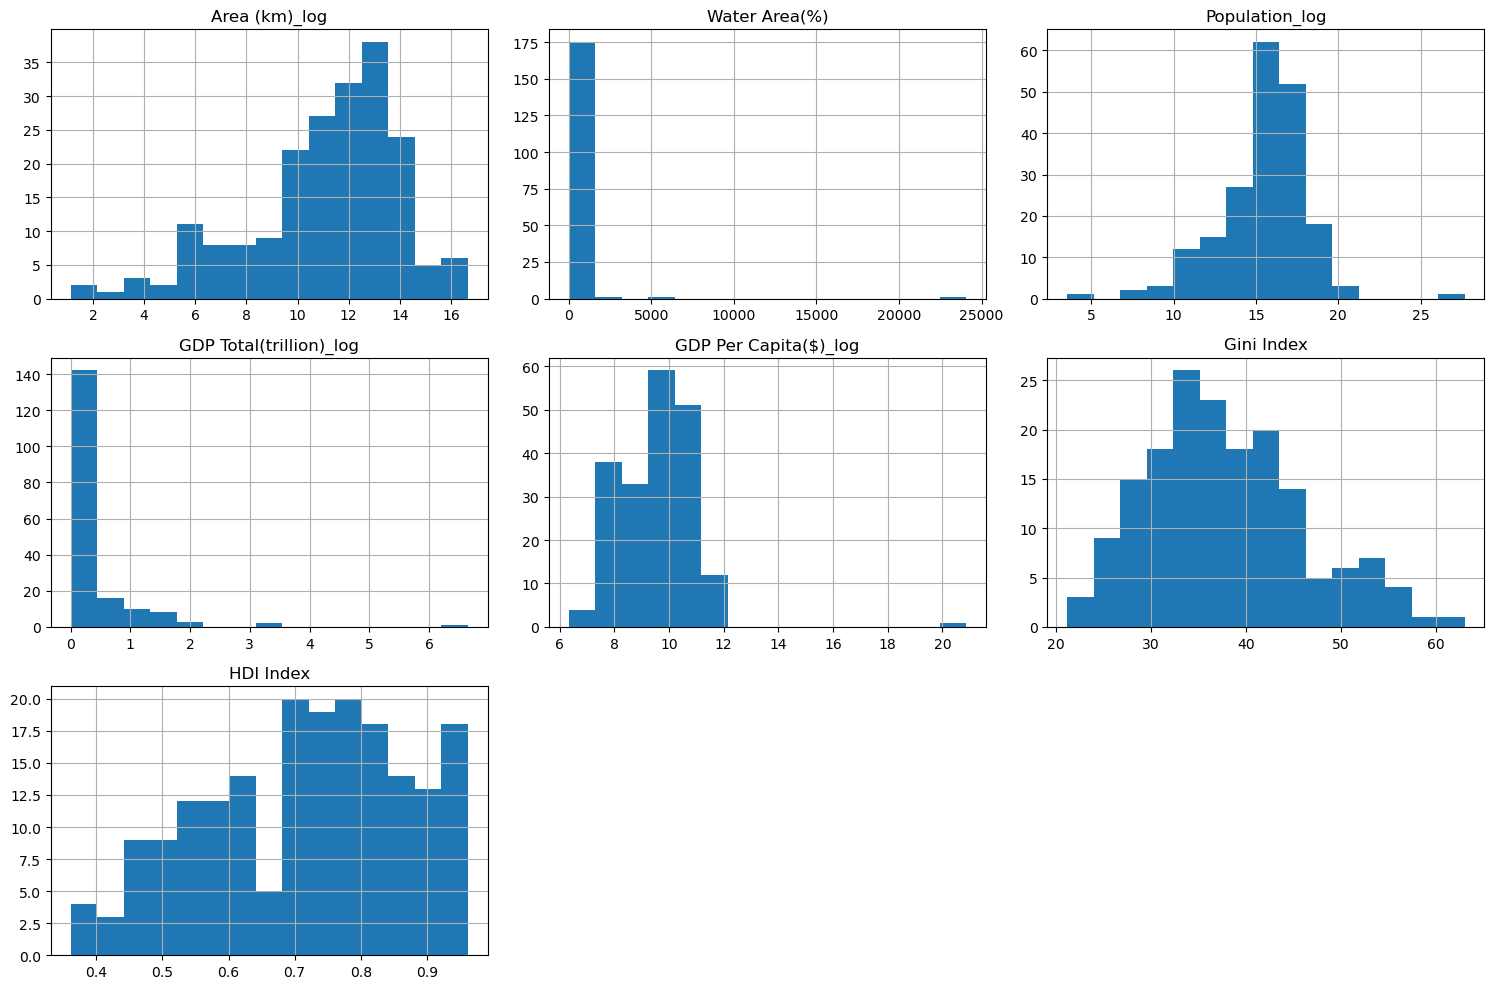

In [26]:
#Basic Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

#log transformation
columns_to_log_transform = ['Area (km)','Population','GDP Total(trillion)','GDP Per Capita($)']

#Applying log transformation(adding a small constant to avoid log(0))
for column in columns_to_log_transform:
    df[column + '_log'] = np.log(df[column] + 1)

#creating Histograms
df.hist(['Area (km)_log',
         'Water Area(%)',
         'Population_log',
         'GDP Total(trillion)_log',
         'GDP Per Capita($)_log',
         'Gini Index',
         'HDI Index'],bins=15,figsize=(15, 10))
plt.tight_layout()
plt.show()


In [27]:
# Assuming higher GDP Total is above the 75th percentile and lower HDI is below the 25th percentile
high_gdp_threshold=df['GDP Total(trillion)'].quantile(0.75)
low_hdi_threshold =df['HDI Index'].quantile(0.25)

#Filter countries with high GDP and low HDI
high_gdp_low_hdi_countries =df[(df['GDP Total(trillion)'] >= high_gdp_threshold)
                               & (df['HDI Index']<= low_hdi_threshold)]
print("Countries with High GDP but Low HDI:\n",
      high_gdp_low_hdi_countries[['Country','GDP Total(trillion)','HDI Index']])


Countries with High GDP but Low HDI:
                           Country  GDP Total(trillion)  HDI Index
124   Federal Republic of Nigeria                1.365      0.535
129  Islamic Republic of Pakistan                1.568      0.544


These countries show a pattern of having relatively high GDPs but lower HDI scores. This suggests that while they have substantial economic output,their human development levels,encompassing factors like education, healthcare, and income distribution, are comparatively lower. 

In [28]:
#Higher GDP Per Capita and Gini Index above 75th percentile
high_gdp_per_capita_threshold = df['GDP Per Capita($)'].quantile(0.75)
high_gini_threshold = df['Gini Index'].quantile(0.75)

#Filtering countries with high GDP Per Capita and high Gini Index
high_gdp_per_capita_high_gini_countries = df[(df['GDP Per Capita($)'] >= high_gdp_per_capita_threshold)
                                             & (df['Gini Index'] >= high_gini_threshold)]
print("Countries with High GDP Per Capita but High Inequality:\n",
      high_gdp_per_capita_high_gini_countries[['Country','GDP Per Capita($)','Gini Index']])


Countries with High GDP Per Capita but High Inequality:
                              Country  GDP Per Capita($)  Gini Index
70   Co-operative Republic of Guyana            61098.0        44.6
132               Republic of Panama            42738.0        49.9
149          Kingdom of Saudi Arabia            68452.0        45.9
154            Republic of Singapore           133107.0        45.9


This suggests that while these countries have significant average wealth per person, this wealth is not evenly distributed among their populations which reveals that this wealth is concentrated in the hands of a smaller segment of the population,leading to inequality.

### GDP and Population Relationship

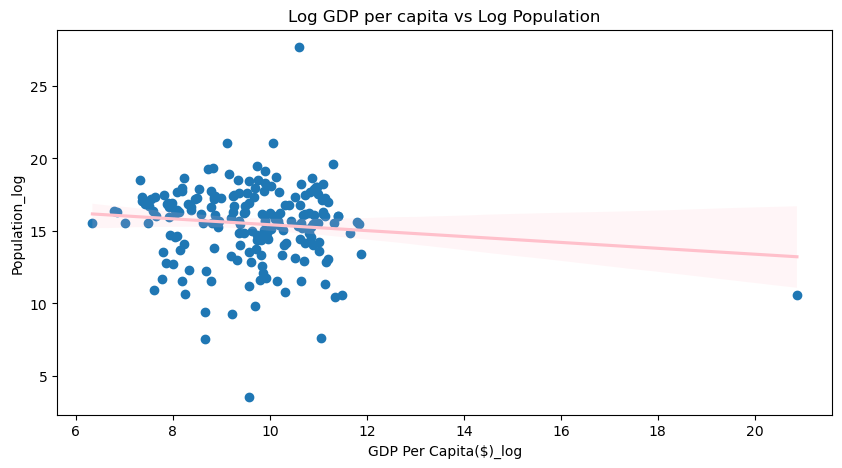

Correlation between log of GDP per capita and log of population:-0.11


In [30]:
#Scatter plot for GDP Total vs Population
plt.figure(figsize=(10,5))
plt.scatter(df['GDP Per Capita($)_log'], df['Population_log'])
plt.xlabel('Log of GDP per capita')
plt.ylabel('Log of Population')
plt.title('Log GDP per capita vs Log Population')

#Adding correlation line
sns.regplot(data=df,x='GDP Per Capita($)_log', y='Population_log', scatter=False,color='pink')
plt.show()

#Calculating correlation
corr=df['GDP Per Capita($)_log'].corr(df['Population_log'])

print(f'Correlation between log of GDP per capita and log of population:{corr:.2f}')


The correlation total GDP andpopulation indicates a weak negative relationship.This implies that there is a slight tendency for countries with larger populations to have lower GDP per capita.However,other factors play a more substantial role in determining a nation's economic output.

### Gini Index and Economic Wealth

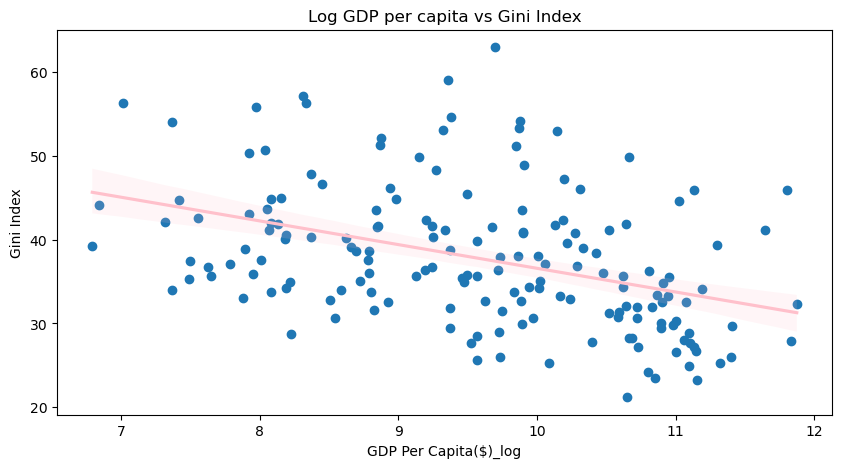

Correlation between log of GDP per capita and Gini index:-0.41


In [31]:
#correlation between gini index and gdp per capita
plt.figure(figsize=(10,5))
plt.scatter(df['GDP Per Capita($)_log'], df['Gini Index'])
plt.xlabel('Log of GDP per capita')
plt.ylabel('Gini Index')
plt.title('Log GDP per capita vs Gini Index')

#Adding correlation line
sns.regplot(data=df, x='GDP Per Capita($)_log', y='Gini Index',scatter=False, color='pink')
plt.show()

#Calculating correlation
corr=df['GDP Per Capita($)_log'].corr(df['Gini Index'])

print(f'Correlation between log of GDP per capita and Gini index:{corr:.2f}')

A correlation of -0.41 between GDP per capita and the Gini index indicates a moderate negative association. Higher income inequality is linked to lower GDP per capita, suggesting that unequal wealth distribution can impact a country's economic welfare.

### Area and Population Density

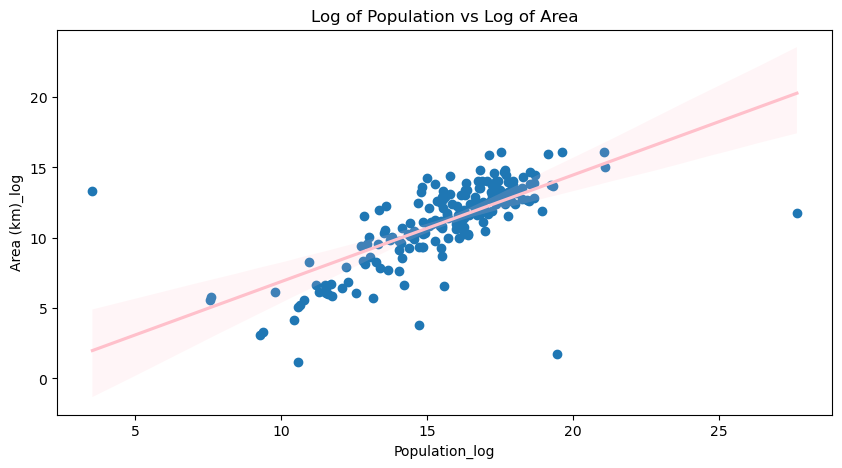

Correlation between log of population and log of area:0.70


In [32]:
#corrlation between population size and area of the countries
plt.figure(figsize=(10,5))
plt.scatter(df['Population_log'], df['Area (km)_log'])
plt.xlabel('Lof of Population')
plt.ylabel('Log of Area')
plt.title('Log of Population vs Log of Area')

#Adding correlation line
sns.regplot(data=df,x='Population_log',y='Area (km)_log', scatter=False, color='pink')
plt.show()

#Calculating correlation
corr=df['Population_log'].corr(df['Area (km)_log'])

print(f'Correlation between log of population and log of area:{corr:.2f}')

The strong positive correlation of 0.70 between population size and land area,indicates that countries with larger populations tend to occupy more land.This relationship is important for understanding population densityand resource management in economics

### GDP Per Capita and Human Development Index Relationship

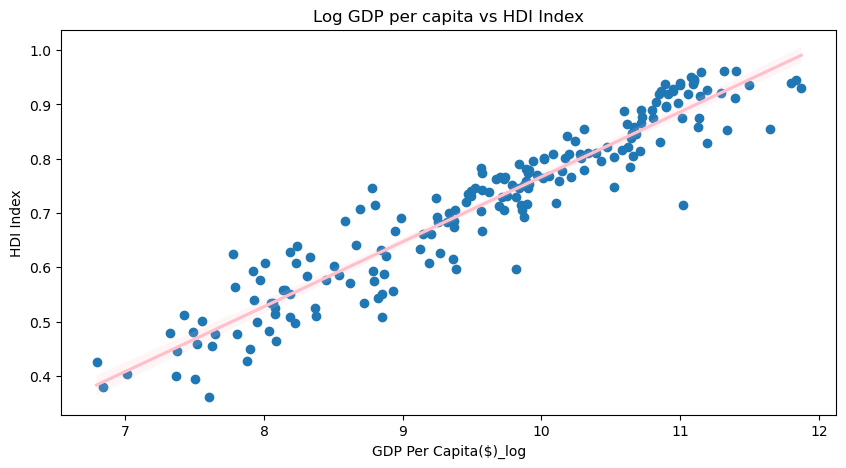

Correlation between log of GDP per capita and HDI index:0.95


In [33]:
#correlation between gdp per capita and HDI index
plt.figure(figsize=(10,5))
plt.scatter(df['GDP Per Capita($)_log'], df['HDI Index'])
plt.xlabel('Log of GDP per capita')
plt.ylabel('HDI Index')
plt.title('Log GDP per capita vs HDI Index')

#Add correlation line
sns.regplot(data=df, x='GDP Per Capita($)_log', y='HDI Index', scatter=False, color='pink')
plt.show()

#Calculating correlation
corr=df['GDP Per Capita($)_log'].corr(df['HDI Index'])

print(f'Correlation between log of GDP per capita and HDI index:{corr:.2f}')

The scatter plot between HDI Index and log GDP per capita illustrates that countries with higher HDI values tend to have higher incomes. This aligns with the belief that investments in education, healthcare, and overall human development are key drivers of economic growth.

### OLS Analysis

In [34]:
#Dropping rows with missing values in the columns of interest
regression_df = df.dropna(subset=['Population_log', 'GDP Per Capita($)_log','HDI Index','Gini Index'])

#Defining the dependent variable
Y = regression_df['GDP Per Capita($)_log']

#Defining the independent variables
X = regression_df[['Population_log', 'HDI Index','Gini Index']]

#Adding a constant to the model (intercept)
X = sm.add_constant(X)

#Fitting the regression model
model = sm.OLS(Y, X).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     GDP Per Capita($)_log   R-squared:                       0.912
Model:                               OLS   Adj. R-squared:                  0.910
Method:                    Least Squares   F-statistic:                     567.0
Date:                   Thu, 18 Jan 2024   Prob (F-statistic):           1.22e-86
Time:                           00:44:23   Log-Likelihood:                -64.898
No. Observations:                    169   AIC:                             137.8
Df Residuals:                        165   BIC:                             150.3
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

The model's robust R-squared explains 91% of the variability in GDP per capita among countries can be explained by the three factors considered:HDI Index,population,and Gini Index.This combined influence significantly contributes to a nation's economic wellfare.Notably,the HDI Index demonstrates a strong positive correlation with GDP per capita,underlining the crucial role of human development in fostering prosperity.Nations with higher HDI scores tend to have well-educated workforces,robust healthcare systems,and higher incomes,resulting in elevated GDP per capita figures.Conversely,the coefficient of 0.0093 associated with population suggests that the sheer size of a population does not have a considerable impact on per capita income,Instead, the key drivers of economic growth include factors like productivity, technological advancement,and efficient resource management.Similarly, the Gini Index, with a coefficient of 0.0029,does not show a direct link with GDP per capita,implying that income inequality alone does not dictate a country's economic development.